In [134]:
#Importação da bibliotecas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import scipy.stats as stats
import random

#Carregamento do pacote Sklearn
import sklearn.metrics as m
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [135]:
#1.3 #Carregar a base de dados ocorrencia

#leitura do arquivo ocorrencia.csv
df_ocorrencia = pd.read_csv("C:\\Users\\fefaj\\OneDrive\\Área de Trabalho\\
TCC Aprovado\\Desenvolvimento\\Base de dados\\ocorrencia.csv", 
                          encoding = "UTF-8", sep = ";", decimal = ',')

In [136]:
df_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               6114 non-null   int64 
 1   codigo_ocorrencia1              6114 non-null   int64 
 2   codigo_ocorrencia2              6114 non-null   int64 
 3   codigo_ocorrencia3              6114 non-null   int64 
 4   codigo_ocorrencia4              6114 non-null   int64 
 5   ocorrencia_classificacao        6114 non-null   object
 6   ocorrencia_latitude             4552 non-null   object
 7   ocorrencia_longitude            4552 non-null   object
 8   ocorrencia_cidade               6114 non-null   object
 9   ocorrencia_uf                   6114 non-null   object
 10  ocorrencia_pais                 6114 non-null   object
 11  ocorrencia_aerodromo            6114 non-null   object
 12  ocorrencia_dia                  6114 non-null   

In [137]:
#Exclusão das colunas que não serão utilizadas
df_ocorrencia = df_ocorrencia.drop(columns=['codigo_ocorrencia1',
'codigo_ocorrencia2',
'codigo_ocorrencia3',
'codigo_ocorrencia4',
'ocorrencia_latitude',
'ocorrencia_longitude',
'ocorrencia_pais',
'ocorrencia_aerodromo',
'ocorrencia_hora',
'investigacao_aeronave_liberada',
'investigacao_status',
'divulgacao_relatorio_numero',
'divulgacao_relatorio_publicado',
'divulgacao_dia_publicacao',
'total_recomendacoes',
'total_aeronaves_envolvidas',
'ocorrencia_saida_pista'])

In [138]:
#Verifificar os valores nulos
df_ocorrencia.isnull().sum()

codigo_ocorrencia           0
ocorrencia_classificacao    0
ocorrencia_cidade           0
ocorrencia_uf               0
ocorrencia_dia              0
dtype: int64

In [139]:
#verificar o tipos das colunas
df_ocorrencia.dtypes

codigo_ocorrencia            int64
ocorrencia_classificacao    object
ocorrencia_cidade           object
ocorrencia_uf               object
ocorrencia_dia              object
dtype: object

In [140]:
#converter a coluna ocorrencia_dia paa data
df_ocorrencia['ocorrencia_dia']= pd.DataFrame({'ocorrencia_dia': pd.to_datetime(df_ocorrencia['ocorrencia_dia'])})

In [141]:
#verificar o tipos das colunas
df_ocorrencia.dtypes

codigo_ocorrencia                    int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_dia              datetime64[ns]
dtype: object

In [142]:
#Transformado a coluna ocorrencia_dia para o ano da céclula
df_ocorrencia['ocorrencia_dia'] = df_ocorrencia['ocorrencia_dia'].dt.year

In [143]:
#Alterar a coluna 'ocorrencia_dia' para 'ocorrencia_ano' 
df_ocorrencia.rename(columns={'ocorrencia_dia': 'ocorrencia_ano'}, inplace=True)

In [144]:
df_ocorrencia['ocorrencia_ano'] = df_ocorrencia['ocorrencia_ano'].astype(str)

In [145]:
#Carregar a base de dados aeronave

df_aeronave = pd.read_csv("C:\\Users\\fefaj\\OneDrive\\Área de Trabalho\\
TCC Aprovado\\Desenvolvimento\\Base de dados\\aeronave.csv", 
                          encoding = "UTF-8", sep = ";", decimal = ',')

In [146]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           6188 non-null   int64  
 1   aeronave_matricula           6188 non-null   object 
 2   aeronave_operador_categoria  6188 non-null   object 
 3   aeronave_tipo_veiculo        6188 non-null   object 
 4   aeronave_fabricante          6188 non-null   object 
 5   aeronave_modelo              6188 non-null   object 
 6   aeronave_tipo_icao           6188 non-null   object 
 7   aeronave_motor_tipo          6185 non-null   object 
 8   aeronave_motor_quantidade    6188 non-null   object 
 9   aeronave_pmd                 6188 non-null   int64  
 10  aeronave_pmd_categoria       6188 non-null   int64  
 11  aeronave_assentos            6010 non-null   float64
 12  aeronave_ano_fabricacao      6005 non-null   float64
 13  aeronave_pais_fabr

In [147]:
#Alterar a coluna 'codigo_ocorrencia2' para 'codigo_ocorrencia' para ficar similiar o dataframe ocorrencia
df_aeronave.rename(columns={'codigo_oco rrencia2': 'codigo_ocorrencia'}, inplace=True)

In [148]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            6188 non-null   int64  
 1   aeronave_matricula           6188 non-null   object 
 2   aeronave_operador_categoria  6188 non-null   object 
 3   aeronave_tipo_veiculo        6188 non-null   object 
 4   aeronave_fabricante          6188 non-null   object 
 5   aeronave_modelo              6188 non-null   object 
 6   aeronave_tipo_icao           6188 non-null   object 
 7   aeronave_motor_tipo          6185 non-null   object 
 8   aeronave_motor_quantidade    6188 non-null   object 
 9   aeronave_pmd                 6188 non-null   int64  
 10  aeronave_pmd_categoria       6188 non-null   int64  
 11  aeronave_assentos            6010 non-null   float64
 12  aeronave_ano_fabricacao      6005 non-null   float64
 13  aeronave_pais_fabr

In [149]:
df_aeronave["codigo_ocorrencia"].duplicated().sum()

74

In [150]:
#Removendo os valores duplicados da coluna 'codigo_ocorrencia'
df_aeronave = df_aeronave.drop_duplicates(subset=['codigo_ocorrencia'])

In [151]:
df_aeronave["codigo_ocorrencia"].duplicated().sum()

0

In [152]:
df_basededados = pd.merge(df_ocorrencia, df_aeronave, on='codigo_ocorrencia', how="left")

In [153]:
df_basededados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6114 entries, 0 to 6113
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            6114 non-null   int64  
 1   ocorrencia_classificacao     6114 non-null   object 
 2   ocorrencia_cidade            6114 non-null   object 
 3   ocorrencia_uf                6114 non-null   object 
 4   ocorrencia_ano               6114 non-null   object 
 5   aeronave_matricula           6114 non-null   object 
 6   aeronave_operador_categoria  6114 non-null   object 
 7   aeronave_tipo_veiculo        6114 non-null   object 
 8   aeronave_fabricante          6114 non-null   object 
 9   aeronave_modelo              6114 non-null   object 
 10  aeronave_tipo_icao           6114 non-null   object 
 11  aeronave_motor_tipo          6111 non-null   object 
 12  aeronave_motor_quantidade    6114 non-null   object 
 13  aeronave_pmd      

In [154]:
#Carregar a base de dados fator_Contribuinte

df_fatorContribuinte = pd.read_csv("C:\\Users\\fefaj\\OneDrive\\Área de Trabalho\\
TCC Aprovado\\Desenvolvimento\\Base de dados\\fatorcontribuinte.csv") 
                        


In [155]:
df_fatorContribuinte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   4485 non-null   int64 
 1   fator_nome           4485 non-null   object
 2   fator_aspecto        4485 non-null   object
 3   fator_condicionante  4485 non-null   object
 4   fator_area           4485 non-null   object
dtypes: int64(1), object(4)
memory usage: 175.3+ KB


In [156]:
#Alterar a coluna 'codigo_ocorrencia3' para 'codigo_ocorrencia' para ficar similiar o dataframe ocorrencia
df_fatorContribuinte.rename(columns={'codigo_ocorrencia3': 'codigo_ocorrencia'}, inplace=True)

In [157]:
df_fatorContribuinte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia    4485 non-null   int64 
 1   fator_nome           4485 non-null   object
 2   fator_aspecto        4485 non-null   object
 3   fator_condicionante  4485 non-null   object
 4   fator_area           4485 non-null   object
dtypes: int64(1), object(4)
memory usage: 175.3+ KB


In [158]:
#Verficação de Valores duplicados
df_fatorContribuinte["codigo_ocorrencia"].duplicated().sum()

3333

In [159]:
#Exclusão de Valores duplicados
df_fatorContribuinte = df_fatorContribuinte.drop_duplicates(subset=['codigo_ocorrencia'])

In [160]:
#Verficação de Valores duplicados
df_fatorContribuinte["codigo_ocorrencia"].duplicated().sum()

0

In [161]:
df_basededados = pd.merge(df_basededados, df_fatorContribuinte, on='codigo_ocorrencia', how="left")

In [162]:
df_basededados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6114 entries, 0 to 6113
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            6114 non-null   int64  
 1   ocorrencia_classificacao     6114 non-null   object 
 2   ocorrencia_cidade            6114 non-null   object 
 3   ocorrencia_uf                6114 non-null   object 
 4   ocorrencia_ano               6114 non-null   object 
 5   aeronave_matricula           6114 non-null   object 
 6   aeronave_operador_categoria  6114 non-null   object 
 7   aeronave_tipo_veiculo        6114 non-null   object 
 8   aeronave_fabricante          6114 non-null   object 
 9   aeronave_modelo              6114 non-null   object 
 10  aeronave_tipo_icao           6114 non-null   object 
 11  aeronave_motor_tipo          6111 non-null   object 
 12  aeronave_motor_quantidade    6114 non-null   object 
 13  aeronave_pmd      

In [163]:
#Carregar a base de dados ocorrencia tipo

df_ocorrenciatipo = pd.read_csv("C:\\Users\\fefaj\\OneDrive\\Área de Trabalho\\
TCC Aprovado\\Desenvolvimento\\Base de dados\\ocorrenciatipo.csv", 
                          encoding = "UTF-8", sep = ";", decimal = ',')

In [164]:
df_ocorrenciatipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         6283 non-null   int64 
 1   ocorrencia_tipo            6283 non-null   object
 2   ocorrencia_tipo_categoria  6283 non-null   object
 3   taxonomia_tipo_icao        6283 non-null   object
dtypes: int64(1), object(3)
memory usage: 196.5+ KB


In [165]:
#Alterar a coluna 'codigo_ocorrencia1' para 'codigo_ocorrencia' para ficar similiar o dataframe ocorrencia
df_ocorrenciatipo.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia'}, inplace=True)

In [166]:
df_ocorrenciatipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia          6283 non-null   int64 
 1   ocorrencia_tipo            6283 non-null   object
 2   ocorrencia_tipo_categoria  6283 non-null   object
 3   taxonomia_tipo_icao        6283 non-null   object
dtypes: int64(1), object(3)
memory usage: 196.5+ KB


In [167]:
df_ocorrenciatipo["codigo_ocorrencia"].duplicated().sum()

169

In [168]:
df_ocorrenciatipo = df_ocorrenciatipo.drop_duplicates(subset=['codigo_ocorrencia'])

In [169]:
df_ocorrenciatipo["codigo_ocorrencia"].duplicated().sum()

0

In [170]:
df_basededados = pd.merge(df_basededados, df_ocorrenciatipo, on='codigo_ocorrencia', how="left")

In [171]:
df_basededados.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6114 entries, 0 to 6113
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            6114 non-null   int64  
 1   ocorrencia_classificacao     6114 non-null   object 
 2   ocorrencia_cidade            6114 non-null   object 
 3   ocorrencia_uf                6114 non-null   object 
 4   ocorrencia_ano               6114 non-null   object 
 5   aeronave_matricula           6114 non-null   object 
 6   aeronave_operador_categoria  6114 non-null   object 
 7   aeronave_tipo_veiculo        6114 non-null   object 
 8   aeronave_fabricante          6114 non-null   object 
 9   aeronave_modelo              6114 non-null   object 
 10  aeronave_tipo_icao           6114 non-null   object 
 11  aeronave_motor_tipo          6111 non-null   object 
 12  aeronave_motor_quantidade    6114 non-null   object 
 13  aeronave_pmd      

In [172]:
#Inserindo coluna para contagem
df_basededados['Contagem'] = 1

In [173]:
df_basededados.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6114 entries, 0 to 6113
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            6114 non-null   int64  
 1   ocorrencia_classificacao     6114 non-null   object 
 2   ocorrencia_cidade            6114 non-null   object 
 3   ocorrencia_uf                6114 non-null   object 
 4   ocorrencia_ano               6114 non-null   object 
 5   aeronave_matricula           6114 non-null   object 
 6   aeronave_operador_categoria  6114 non-null   object 
 7   aeronave_tipo_veiculo        6114 non-null   object 
 8   aeronave_fabricante          6114 non-null   object 
 9   aeronave_modelo              6114 non-null   object 
 10  aeronave_tipo_icao           6114 non-null   object 
 11  aeronave_motor_tipo          6111 non-null   object 
 12  aeronave_motor_quantidade    6114 non-null   object 
 13  aeronave_pmd      

In [174]:
#Excluir colunas onde o código da ocorrência é inválido
df_basededados['codigo_ocorrencia'].dropna(axis = 0, inplace = True)

In [175]:
#exclusão de valores nulos de valores nulos no dataframe
df_basededados.dropna(inplace=True)

In [176]:
df_basededados.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 3 to 5709
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            1140 non-null   int64  
 1   ocorrencia_classificacao     1140 non-null   object 
 2   ocorrencia_cidade            1140 non-null   object 
 3   ocorrencia_uf                1140 non-null   object 
 4   ocorrencia_ano               1140 non-null   object 
 5   aeronave_matricula           1140 non-null   object 
 6   aeronave_operador_categoria  1140 non-null   object 
 7   aeronave_tipo_veiculo        1140 non-null   object 
 8   aeronave_fabricante          1140 non-null   object 
 9   aeronave_modelo              1140 non-null   object 
 10  aeronave_tipo_icao           1140 non-null   object 
 11  aeronave_motor_tipo          1140 non-null   object 
 12  aeronave_motor_quantidade    1140 non-null   object 
 13  aeronave_pmd      

In [177]:
#2. Análise e exploração de dados
#2.1Gerar gráficos
#Importação da função Counter e da biblioteca matplotlib.pyplot
from collections import Counter
import matplotlib.pyplot as plt

In [178]:
df_basededados = df_basededados.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
df_basededados['Contagem'] = 1

In [179]:
#Quatidade de acidentes por ano
#Contagem das opções da coluna ano
ano_ocorrencias = Counter(df_basededados['ocorrencia_ano'])
ano_ocorrencias

Counter({'2010': 129,
         '2011': 157,
         '2012': 144,
         '2013': 145,
         '2014': 151,
         '2015': 108,
         '2016': 65,
         '2017': 76,
         '2018': 77,
         '2019': 47,
         '2020': 41})

In [180]:
#identificação de valores nulos no dataframe
df_basededados.isnull().sum()

codigo_ocorrencia              0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  0
ocorrencia_ano                 0
aeronave_matricula             0
aeronave_operador_categoria    0
aeronave_tipo_veiculo          0
aeronave_fabricante            0
aeronave_modelo                0
aeronave_tipo_icao             0
aeronave_motor_tipo            0
aeronave_motor_quantidade      0
aeronave_pmd                   0
aeronave_pmd_categoria         0
aeronave_assentos              0
aeronave_ano_fabricacao        0
aeronave_pais_fabricante       0
aeronave_pais_registro         0
aeronave_registro_categoria    0
aeronave_registro_segmento     0
aeronave_voo_origem            0
aeronave_voo_destino           0
aeronave_fase_operacao         0
aeronave_tipo_operacao         0
aeronave_nivel_dano            0
aeronave_fatalidades_total     0
fator_nome                     0
fator_aspecto                  0
fator_condicionante            0
fator_area

In [181]:
Ocorrenciaporano = df_basededados.groupby('ocorrencia_ano')[['codigo_ocorrencia']].count ()

In [182]:
Ocorrenciaporano[:30]

,codigo_ocorrencia
ocorrencia_ano,
2010,129
2011,157
2012,144
2013,145
2014,151
2015,108
2016,65
2017,76
2018,77


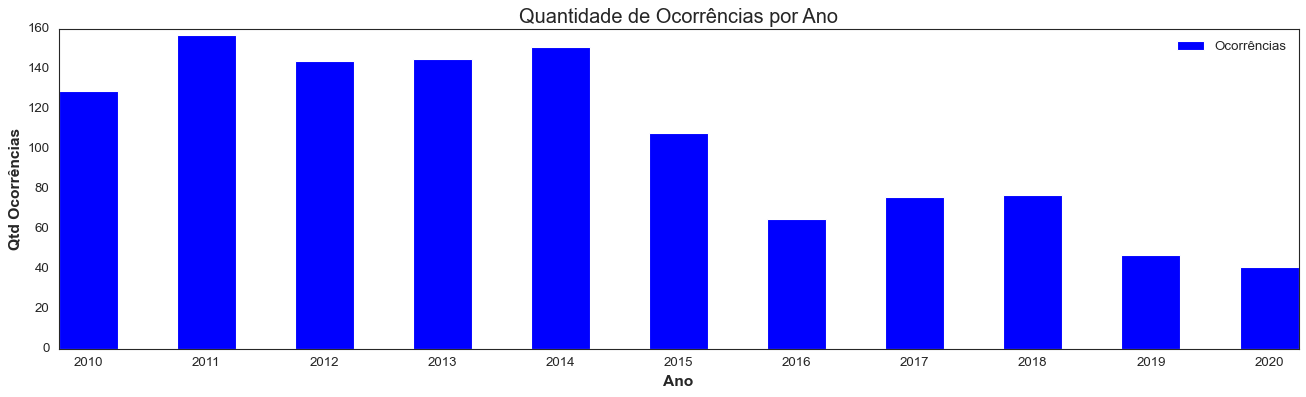

In [183]:
#Plotar gráfico de Quantidade de Ocorrências por Ano
Ocorrenciaporano.plot (kind='bar', figsize=(20, 5), color='blue')
plt.style.use("seaborn-white")
plt.axis ('auto')
plt.xlabel('Ano', fontsize = 14, fontweight='bold')
plt.ylabel('Qtd Ocorrências', fontsize = 14 , fontweight='bold')
plt.legend(['Ocorrências'], fontsize = 12)
plt.title("Quantidade de Ocorrências por Ano", fontsize = 18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()

In [184]:
Ocorrenciaporuf = df_basededados.groupby('ocorrencia_uf')[['codigo_ocorrencia']].count ()

In [185]:
Ocorrenciaporuf[:30]

,codigo_ocorrencia
ocorrencia_uf,
AC,11
AL,6
AM,61
AP,1
BA,65
CE,19
DF,18
ES,7
GO,74


In [186]:
df_basededados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 3 to 5709
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            1140 non-null   int64  
 1   ocorrencia_classificacao     1140 non-null   object 
 2   ocorrencia_cidade            1140 non-null   object 
 3   ocorrencia_uf                1140 non-null   object 
 4   ocorrencia_ano               1140 non-null   object 
 5   aeronave_matricula           1140 non-null   object 
 6   aeronave_operador_categoria  1140 non-null   object 
 7   aeronave_tipo_veiculo        1140 non-null   object 
 8   aeronave_fabricante          1140 non-null   object 
 9   aeronave_modelo              1140 non-null   object 
 10  aeronave_tipo_icao           1140 non-null   object 
 11  aeronave_motor_tipo          1140 non-null   object 
 12  aeronave_motor_quantidade    1140 non-null   object 
 13  aeronave_pmd      

In [187]:
tipoaeronave = Counter(df_basededados['ocorrencia_uf'])
tipoaeronave

Counter({'MT': 68,
         'AM': 61,
         'PR': 102,
         'SP': 199,
         'PA': 73,
         'TO': 16,
         'SC': 36,
         'GO': 74,
         'BA': 65,
         'DF': 18,
         'MG': 78,
         'AC': 11,
         'RS': 123,
         'RR': 23,
         'MS': 35,
         'PE': 20,
         'RJ': 46,
         'AL': 6,
         'RO': 9,
         'MA': 24,
         'PI': 13,
         'CE': 19,
         'SE': 6,
         'ES': 7,
         'RN': 3,
         'AP': 1,
         'PB': 3,
         'NÃO IDENTIFICADO': 1})

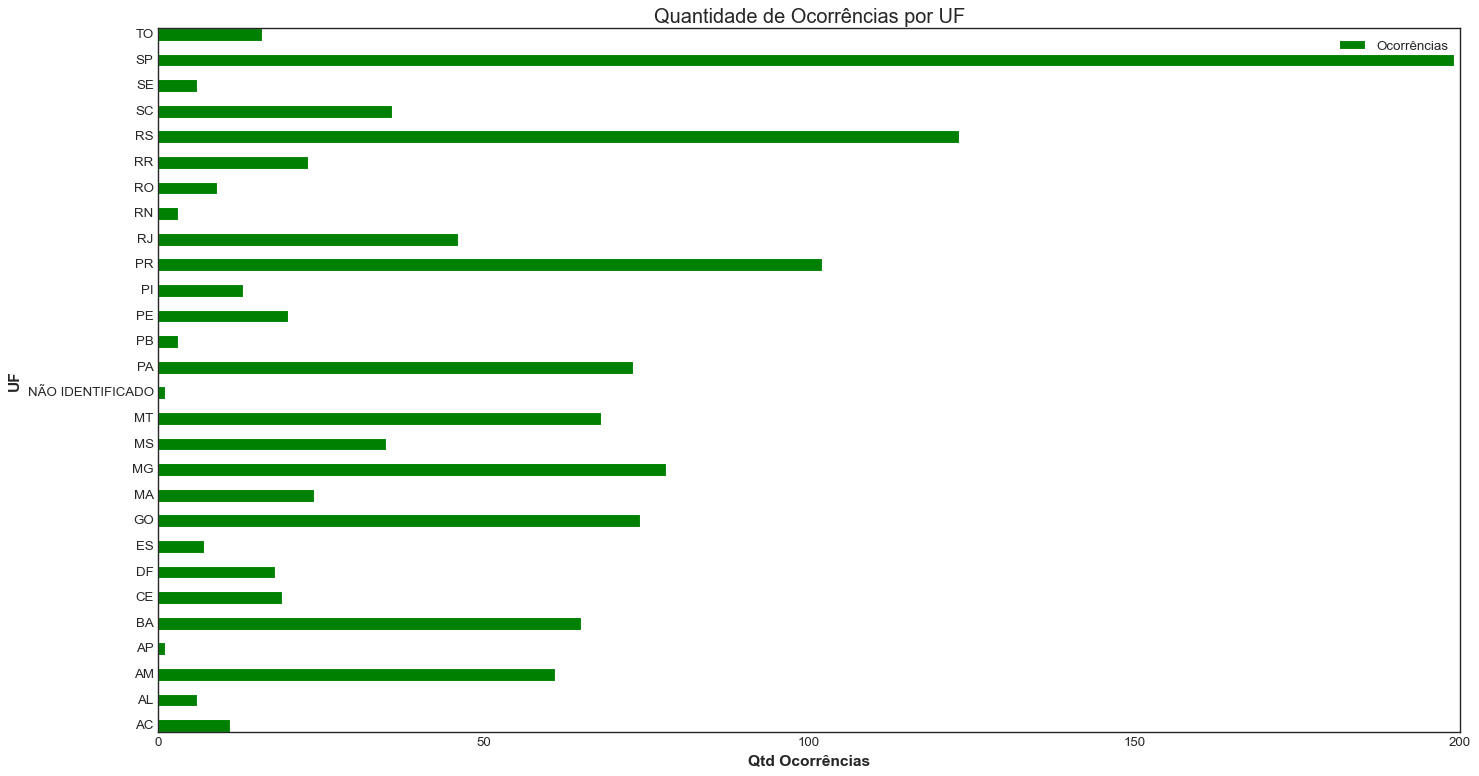

In [188]:
Ocorrenciaporuf.plot (kind='barh', figsize=(21, 11), color='green')
plt.style.use("seaborn-pastel")
plt.axis ('auto')
plt.xlabel('Qtd Ocorrências', fontsize = 14, fontweight='bold')
plt.ylabel('UF', fontsize = 14 , fontweight='bold')
plt.legend(['Ocorrências'], fontsize = 12)
plt.title("Quantidade de Ocorrências por UF", fontsize = 18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()

In [189]:
#Quatidade de acidentes por tipo de aeronave
#Contagem das opções da coluna tipo de aeronave
tipoaeronave = Counter(df_basededados['aeronave_tipo_veiculo'])
tipoaeronave

Counter({'AVIÃO': 948,
         'HELICÓPTERO': 158,
         'PLANADOR': 7,
         'ANFÍBIO': 4,
         'ULTRALEVE': 18,
         'NÃO IDENTIFICADO': 5})

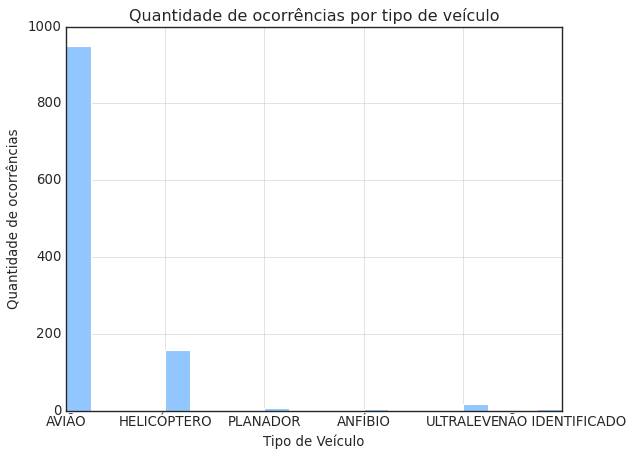

In [190]:
#Gráfico de Quantidade de ocorrências por tipo de veículo"
df_basededados.aeronave_tipo_veiculo.hist(bins=20)
plt.style.use('classic')
plt.xlabel("Tipo de Veículo")
plt.ylabel("Quantidade de ocorrências")
plt.title("Quantidade de ocorrências por tipo de veículo")
plt.show()

In [191]:
aeronavefabricante = df_basededados.groupby('aeronave_fabricante')[['codigo_ocorrencia']].count ()

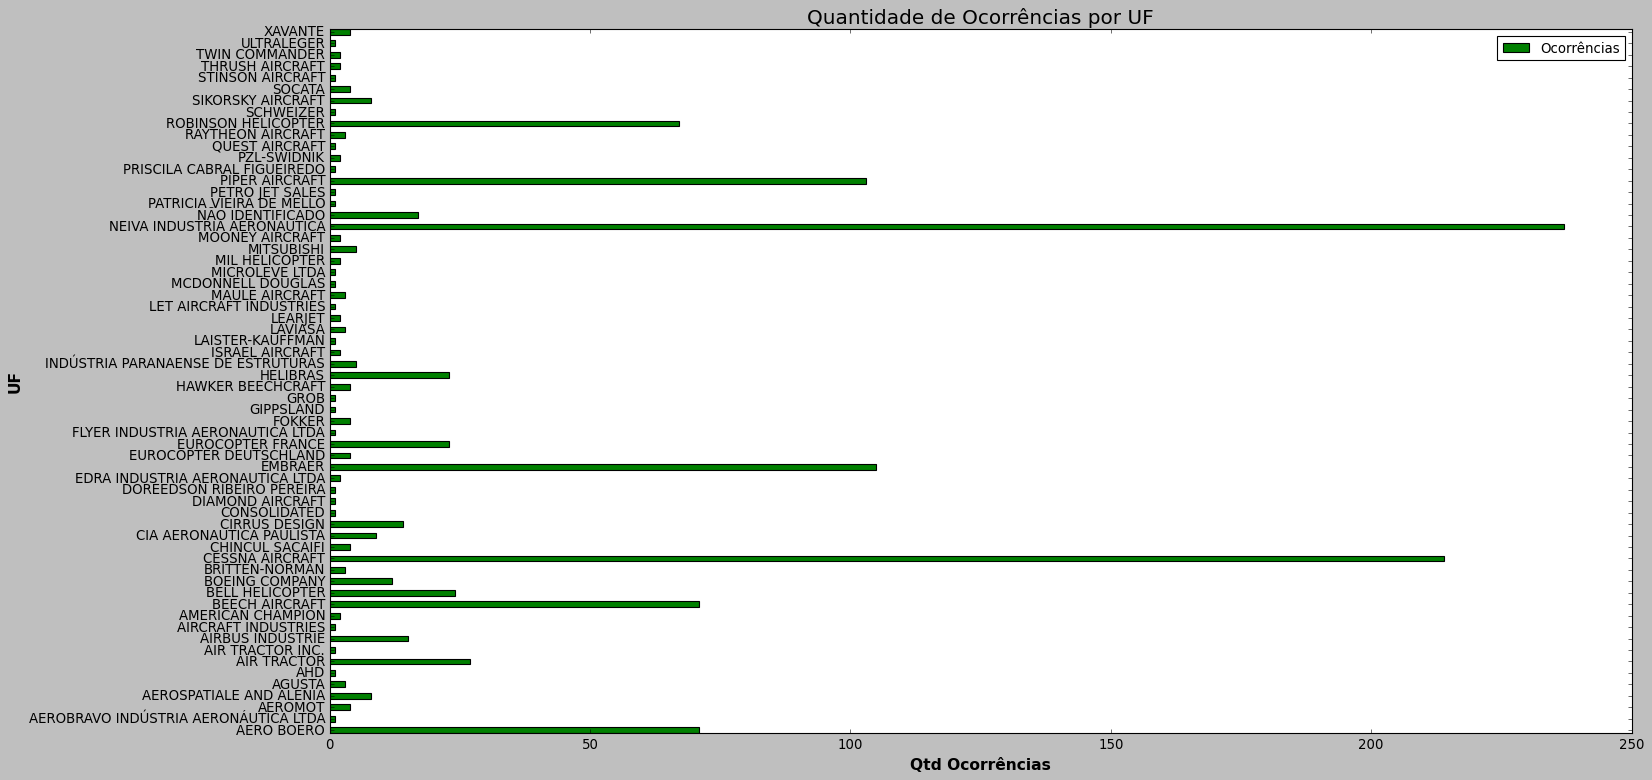

In [192]:
aeronavefabricante.plot (kind='barh', figsize=(21, 11), color='green')
plt.style.use("seaborn-pastel")
plt.axis ('auto')
plt.xlabel('Qtd Ocorrências', fontsize = 14, fontweight='bold')
plt.ylabel('UF', fontsize = 14 , fontweight='bold')
plt.legend(['Ocorrências'], fontsize = 12)
plt.title("Quantidade de Ocorrências por UF", fontsize = 18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()

In [193]:
import seaborn as sns

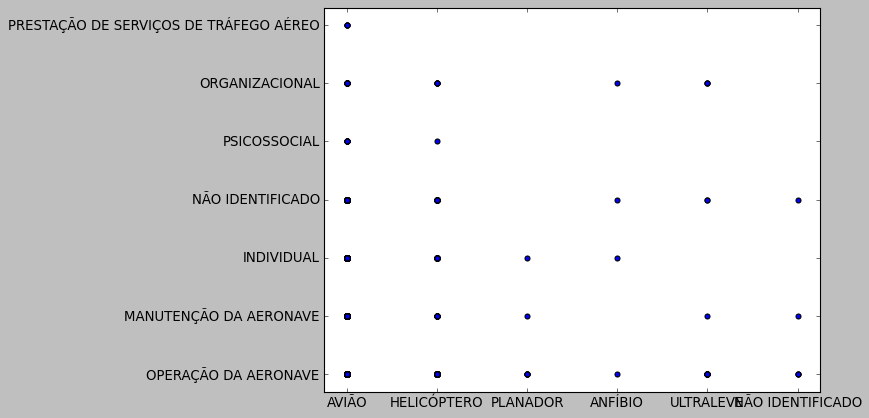

In [194]:
from bokeh.sampledata.iris import flowers as dados
X = df_basededados['aeronave_tipo_veiculo']
Y = df_basededados['fator_condicionante']
plt.scatter(X,Y)
plt.show()

In [195]:
#Quatidade de acidentes por classificação
#Contagem das opções da coluna ano
ocorrenciaclassificacao = Counter(df_basededados['ocorrencia_classificacao'])
ocorrenciaclassificacao

Counter({'ACIDENTE': 845, 'INCIDENTE GRAVE': 281, 'INCIDENTE': 14})

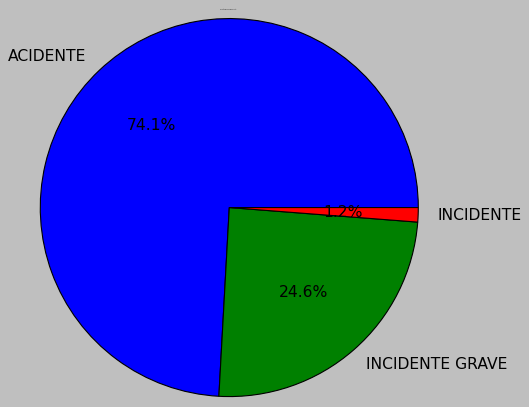

In [196]:
plt.style.use('classic')
plt.pie(ocorrenciaclassificacao.values(), labels = ocorrenciaclassificacao.keys(), 
        autopct = '%1.1f%%', textprops={'fontsize': 14})
plt.title("Ocorrências Por Classificação", fontsize=1)
plt.axis("image")
plt.show()

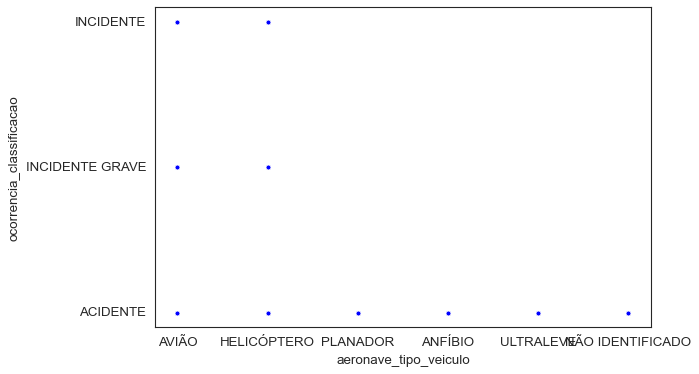

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(8, 5))

# Gráfico de Dispersão
g = sns.scatterplot(x="aeronave_tipo_veiculo", y="ocorrencia_classificacao", 
                    data=df_basededados)
plt.show()

In [198]:
df_basededados.info

<bound method DataFrame.info of       codigo_ocorrencia ocorrencia_classificacao        ocorrencia_cidade  \
3                 39527                 ACIDENTE       LUCAS DO RIO VERDE   
7                 39707          INCIDENTE GRAVE                 CANUTAMA   
8                 39156          INCIDENTE GRAVE                 CASCAVEL   
11                40069                 ACIDENTE                SÃO PAULO   
13                39507                 ACIDENTE       PRIMAVERA DO LESTE   
...                 ...                      ...                      ...   
5640              79619                 ACIDENTE                    FEIJÓ   
5649              79627                 ACIDENTE           BIRITIBA-MIRIM   
5676              79671                 ACIDENTE     SÃO MIGUEL DO IGUAÇU   
5697              79692                 ACIDENTE                CATANDUVA   
5709              79713                 ACIDENTE  SANTA VITÓRIA DO PALMAR   

     ocorrencia_uf ocorrencia_ano aeronave_

In [199]:
#Cores para serem usadas nos gráficos
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

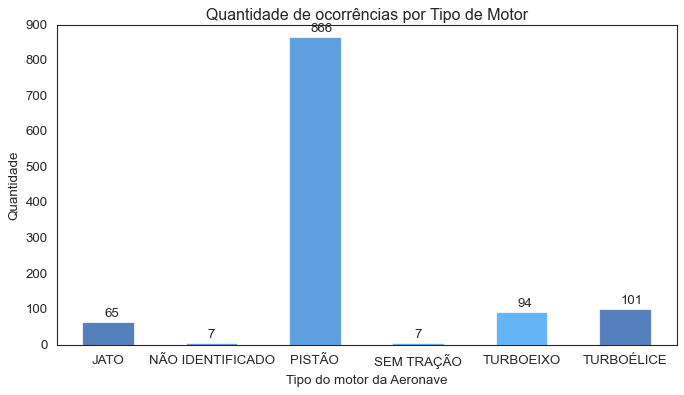

In [335]:
classificacao = df_basededados.groupby('aeronave_motor_tipo')['Contagem'].sum().plot(kind='bar', 
        figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.04, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('Tipo do motor da Aeronave')
plt.ylabel('Quantidade')
plt.title('Quantidade de ocorrências por Tipo de Motor')
plt.show()

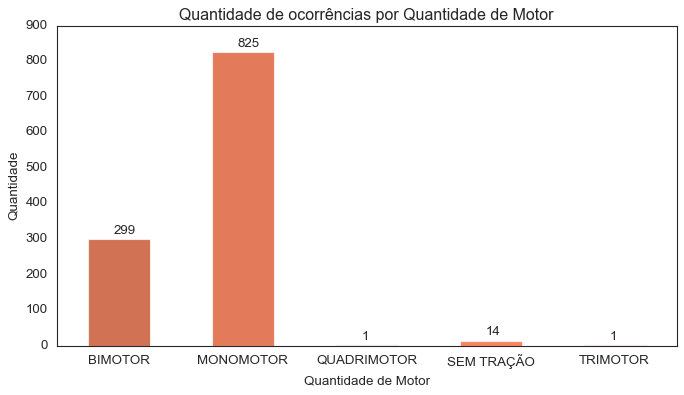

In [336]:
classificacao = df_basededados.groupby('aeronave_motor_quantidade')['Contagem'].sum().plot(kind='bar', 
        figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.04, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('Quantidade de Motor')
plt.ylabel('Quantidade')
plt.title('Quantidade de ocorrências por Quantidade de Motor')
plt.show()

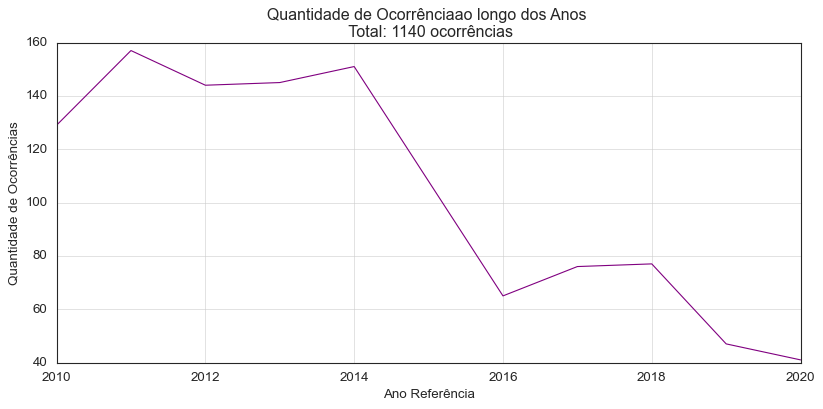

In [316]:
plotagem_data = df_basededados.copy()
plotagem_data['ocorrencia_ano'] = plotagem_data['ocorrencia_ano'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('ocorrencia_ano')['Contagem'].sum().plot(color='purple', figsize=(12,5), grid=True)

plt.title('Quantidade de Ocorrênciaao longo dos Anos \n Total: ' + str(df_basededados['Contagem'].sum()) + ' ocorrências')
plt.xlabel('Ano Referência')
plt.ylabel('Quantidade de Ocorrências')
plt.show()

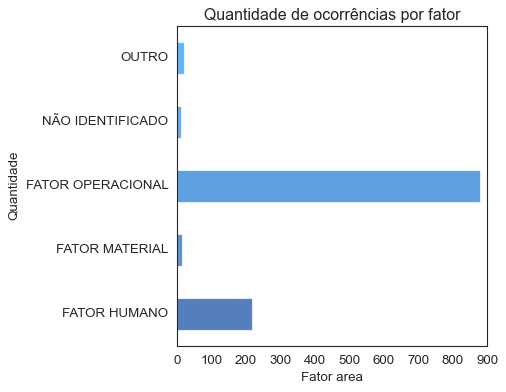

In [340]:
fatorarea = df_basededados.groupby('fator_area')['Contagem'].sum().plot(kind='barh',
figsize=(5,5), color=random.choice(colors), alpha=.7)

for p in fatorarea .patches:
    b=p.get_bbox()
    

plt.xticks(rotation=0)
plt.xlabel('Fator area')
plt.ylabel('Quantidade')
plt.title('Quantidade de ocorrências por fator')
plt.show()

In [330]:
# convertendo para CSV file e salavando no computador para manipulação de dados no Power BI
df_basededados.to_csv(r'C:\Users\fefaj\OneDrive\Área de Trabalho.csv')

In [203]:
#Importação da função train_test_split
from sklearn.model_selection import train_test_split

In [262]:
#Escolha dos atributos para um novo dataset dos modelos de ,machine learninh
df_set = df_basededados[['ocorrencia_classificacao',
                       'aeronave_tipo_veiculo',
                       'fator_aspecto', 
                       'aeronave_motor_quantidade', 'fator_area', 'fator_condicionante']].copy()
df_set.head()


,ocorrencia_classificacao,aeronave_tipo_veiculo,fator_aspecto,aeronave_motor_quantidade,fator_area,fator_condicionante
3,ACIDENTE,AVIÃO,DESEMPENHO DO SER HUMANO,MONOMOTOR,FATOR OPERACIONAL,OPERAÇÃO DA AERONAVE
7,INCIDENTE GRAVE,AVIÃO,DESEMPENHO DO SER HUMANO,BIMOTOR,FATOR OPERACIONAL,OPERAÇÃO DA AERONAVE
8,INCIDENTE GRAVE,AVIÃO,DESEMPENHO DO SER HUMANO,BIMOTOR,FATOR OPERACIONAL,MANUTENÇÃO DA AERONAVE
11,ACIDENTE,HELICÓPTERO,DESEMPENHO DO SER HUMANO,MONOMOTOR,FATOR OPERACIONAL,OPERAÇÃO DA AERONAVE
13,ACIDENTE,AVIÃO,DESEMPENHO DO SER HUMANO,MONOMOTOR,FATOR OPERACIONAL,OPERAÇÃO DA AERONAVE


In [263]:
df_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 3 to 5709
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ocorrencia_classificacao   1140 non-null   object
 1   aeronave_tipo_veiculo      1140 non-null   object
 2   fator_aspecto              1140 non-null   object
 3   aeronave_motor_quantidade  1140 non-null   object
 4   fator_area                 1140 non-null   object
 5   fator_condicionante        1140 non-null   object
dtypes: object(6)
memory usage: 62.3+ KB


In [266]:
#retirandoos valoresde linha com NÃO IDENTIFICADO 
filtro1 = df_set [df_set['ocorrencia_classificacao'] == 'NÃO IDENTIFICADO' ].index
df_set.drop(filtro1 , inplace=True)

In [267]:
#retirandoos valoresde linha com NÃO IDENTIFICADO 
filtro2 = df_set [df_set['aeronave_tipo_veiculo'] == 'NÃO IDENTIFICADO' ].index
df_set.drop(filtro2 , inplace=True)

In [268]:
#retirandoos valoresde linha com NÃO IDENTIFICADO 
filtro3 = df_set [df_set['fator_aspecto'] == 'NÃO IDENTIFICADO' ].index
df_set.drop(filtro3 , inplace=True)

In [269]:
#retirandoos valoresde linha com NÃO IDENTIFICADO 
filtro4 = df_set [df_set['fator_area'] == 'NÃO IDENTIFICADO' ].index
df_set.drop(filtro4 , inplace=True)

In [270]:
#retirandoos valoresde linha com NÃO IDENTIFICADO 
filtro5 = df_set [df_set['fator_condicionante'] == 'NÃO IDENTIFICADO' ].index
df_set.drop(filtro5 , inplace=True)

In [271]:
df_set['ocorrencia_classificacao'].unique()

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

In [272]:
#Identificação dos valores da coluna aeronave_tipo_veiculo
df_set['aeronave_tipo_veiculo'].unique()

array(['AVIÃO', 'HELICÓPTERO', 'PLANADOR', 'ANFÍBIO', 'ULTRALEVE'],
      dtype=object)

In [273]:
#Transformação de valores categóricos em valores inteiros coluna aeronave_tipo_veiculo
ajuste_aeronave_tipo_veiculo = {'AVIÃO': 0, 'HELICÓPTERO': 1, 'PLANADOR': 2, 'ANFÍBIO': 3, 'ULTRALEVE':4}
df_set['aeronave_tipo_veiculo'] = df_set['aeronave_tipo_veiculo'].map(ajuste_aeronave_tipo_veiculo )

In [274]:
#Identificação dos valores da coluna aeronave_tipo_veiculo
df_set['aeronave_tipo_veiculo'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [275]:
#Identificação dos valores da coluna fator_aspecto
df_set['fator_aspecto'].unique()

array(['DESEMPENHO DO SER HUMANO', 'ASPECTO PSICOLÓGICO'], dtype=object)

In [276]:
#Transformação de valores categóricos em valores inteiros coluna fator_aspecto
ajuste_fator_aspecto = {'DESEMPENHO DO SER HUMANO': 0, 'ASPECTO PSICOLÓGICO': 1,
                'ASPECTO MÉDICO': 2, 'ASPECTO DE FABRICAÇÃO': 3,
                'ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL': 4, 'OUTRO': 5,
                 'INFRAESTRUTURA AEROPORTUÁRIA': 6, 'ERGONOMIA': 7, 'ASPECTO DE PROJETO': 8,
                 'ASPECTO DE MANUSEIO DO MATERIAL': 9}

df_set['fator_aspecto'] = df_set['fator_aspecto'].map(ajuste_fator_aspecto)

In [277]:
df_set['fator_aspecto'].unique()

array([0, 1], dtype=int64)

In [278]:
#Identificação dos valores da coluna aeronave_motor_quantidade
df_set['aeronave_motor_quantidade'].unique()

array(['MONOMOTOR', 'BIMOTOR', 'SEM TRAÇÃO', 'QUADRIMOTOR', 'TRIMOTOR'],
      dtype=object)

In [279]:
#Transformação de valores categóricos em valores inteiros coluna aeronave_motor_quantidade
ajuste_aeronave_motor_quantidade = {'MONOMOTOR': 0, 'BIMOTOR': 1, 'SEM TRAÇÃO': 2, 'QUADRIMOTOR': 3, 'TRIMOTOR': 4}

df_set['aeronave_motor_quantidade'] = df_set['aeronave_motor_quantidade'].map(ajuste_aeronave_motor_quantidade)

In [280]:
#Identificação dos valores da coluna fator_area
df_set['fator_area'].unique()

array(['FATOR OPERACIONAL', 'FATOR HUMANO'], dtype=object)

In [281]:
#Transformação de valores categóricos em valores inteiros coluna fator_area
ajuste_fator_area = {'FATOR OPERACIONAL': 0, 'FATOR HUMANO': 1, 'FATOR MATERIAL': 2, 'OUTRO':3 }
df_set['fator_area'] = df_set['fator_area'].map(ajuste_fator_area)

In [282]:
#Identificação dos valores da coluna fator_condicionante
df_set['fator_condicionante'].unique()

array(['OPERAÇÃO DA AERONAVE', 'MANUTENÇÃO DA AERONAVE', 'INDIVIDUAL',
       'PSICOSSOCIAL', 'ORGANIZACIONAL',
       'PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO'], dtype=object)

In [283]:
#Transformação de valores categóricos em valores inteiros coluna fator_condicionante
ajuste_fator_condicionante = {'OPERAÇÃO DA AERONAVE': 0, 'MANUTENÇÃO DA AERONAVE': 1, 'INDIVIDUAL': 2,
       'PSICOSSOCIAL': 3, 'ORGANIZACIONAL': 4,
       'PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO': 5}
df_set['fator_condicionante'] = df_set['fator_condicionante'].map(ajuste_fator_condicionante)

In [284]:
#Divisão para as bases de treinamento
X_train = df_set.drop(['ocorrencia_classificacao'], axis = 1)
y_train = df_set.ocorrencia_classificacao

In [285]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 3 to 5709
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   aeronave_tipo_veiculo      1012 non-null   int64
 1   fator_aspecto              1012 non-null   int64
 2   aeronave_motor_quantidade  1012 non-null   int64
 3   fator_area                 1012 non-null   int64
 4   fator_condicionante        1012 non-null   int64
dtypes: int64(5)
memory usage: 47.4 KB


In [286]:
#Tipo da serie y_train
type(y_train)

pandas.core.series.Series

In [287]:
#Criação das bases de teste e treinamento
#75% para treinamento e 25% para teste
xtreinamento, xteste, ytreinamento, yteste = train_test_split(X_train, y_train, random_state = 0)

In [288]:
#Informação do dataframe de treinamento
xtreinamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 2869 to 3174
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   aeronave_tipo_veiculo      759 non-null    int64
 1   fator_aspecto              759 non-null    int64
 2   aeronave_motor_quantidade  759 non-null    int64
 3   fator_area                 759 non-null    int64
 4   fator_condicionante        759 non-null    int64
dtypes: int64(5)
memory usage: 35.6 KB


In [289]:
#Informação do dataframe de teste
xteste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 3343 to 1835
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   aeronave_tipo_veiculo      253 non-null    int64
 1   fator_aspecto              253 non-null    int64
 2   aeronave_motor_quantidade  253 non-null    int64
 3   fator_area                 253 non-null    int64
 4   fator_condicionante        253 non-null    int64
dtypes: int64(5)
memory usage: 11.9 KB


In [290]:
print (ytreinamento)

2869           ACIDENTE
8       INCIDENTE GRAVE
2313           ACIDENTE
4793    INCIDENTE GRAVE
1372           ACIDENTE
             ...       
3973           ACIDENTE
934     INCIDENTE GRAVE
2906           ACIDENTE
2606           ACIDENTE
3174    INCIDENTE GRAVE
Name: ocorrencia_classificacao, Length: 759, dtype: object


In [291]:
#Importação das funções para as medidas de avaliação dos algoritmos
from sklearn.metrics import accuracy_score, classification_report

In [292]:
#Criação do modelo utilizando a Árvore de decisão
#xtreinamento, xteste, ytreinamento, yteste
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
ocorrencia_classificacao_tree = DecisionTreeClassifier(random_state=0)
ocorrencia_classificacao_tree = ocorrencia_classificacao_tree.fit(xtreinamento, ytreinamento)
print("Acurácia: ", ocorrencia_classificacao_tree.score(xtreinamento, ytreinamento))
Train_predict = ocorrencia_classificacao_tree.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, Train_predict))
print(classification_report(yteste, Train_predict))

Acurácia:  0.7720685111989459
Acurácia de previsão:  0.7351778656126482
                 precision    recall  f1-score   support

       ACIDENTE       0.76      0.98      0.86       185
      INCIDENTE       0.00      0.00      0.00         3
INCIDENTE GRAVE       0.42      0.08      0.13        65

       accuracy                           0.74       253
      macro avg       0.39      0.35      0.33       253
   weighted avg       0.66      0.74      0.66       253



In [293]:
#Criação do modelo utilizando a Regressão Logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(xtreinamento, ytreinamento)
print("Acurácia: ", lr.score(xtreinamento, ytreinamento))
tp_lr = lr.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_lr))
print(classification_report(yteste, tp_lr))

Acurácia:  0.758893280632411
Acurácia de previsão:  0.7351778656126482
                 precision    recall  f1-score   support

       ACIDENTE       0.75      0.98      0.85       185
      INCIDENTE       0.00      0.00      0.00         3
INCIDENTE GRAVE       0.44      0.06      0.11        65

       accuracy                           0.74       253
      macro avg       0.40      0.35      0.32       253
   weighted avg       0.66      0.74      0.65       253



C:\Users\fefaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
#Criação do modelo utilizando Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(xtreinamento, ytreinamento)
print("Acurácia: ", nb.score(xtreinamento, ytreinamento))
tp_nb = nb.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_nb))
print(classification_report(yteste, tp_nb))

Acurácia:  0.45586297760210803
Acurácia de previsão:  0.4505928853754941
                 precision    recall  f1-score   support

       ACIDENTE       0.82      0.34      0.48       185
      INCIDENTE       0.00      0.00      0.00         3
INCIDENTE GRAVE       0.29      0.78      0.43        65

       accuracy                           0.45       253
      macro avg       0.37      0.38      0.30       253
   weighted avg       0.67      0.45      0.46       253



In [295]:
#Criação do modelo utilizando Gradiente Descendente
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd = sgd.fit(xtreinamento, ytreinamento)
print("Acurácia: ", sgd.score(xtreinamento, ytreinamento))
tp_sgd = sgd.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_sgd))
print(classification_report(yteste, tp_sgd))

Acurácia:  0.7523056653491436
Acurácia de previsão:  0.7351778656126482
                 precision    recall  f1-score   support

       ACIDENTE       0.73      1.00      0.85       185
      INCIDENTE       0.00      0.00      0.00         3
INCIDENTE GRAVE       1.00      0.02      0.03        65

       accuracy                           0.74       253
      macro avg       0.58      0.34      0.29       253
   weighted avg       0.79      0.74      0.63       253



C:\Users\fefaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [296]:
#Criação do modelo utilizando KNN (K - Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(xtreinamento, ytreinamento)
print("Acurácia: ", knn.score(xtreinamento, ytreinamento))
tp_knn = knn.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_knn))
print(classification_report(yteste, tp_knn))

Acurácia:  0.758893280632411
Acurácia de previsão:  0.7351778656126482
                 precision    recall  f1-score   support

       ACIDENTE       0.74      0.99      0.85       185
      INCIDENTE       0.00      0.00      0.00         3
INCIDENTE GRAVE       0.50      0.03      0.06        65

       accuracy                           0.74       253
      macro avg       0.41      0.34      0.30       253
   weighted avg       0.67      0.74      0.63       253



C:\Users\fefaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [331]:
#Criação do modelo utilizando Randon Forest 
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm = rfm.fit(xtreinamento, ytreinamento)
print("Acurácia: ", rfm.score(xtreinamento, ytreinamento))
tp_rfm = rfm.predict(xteste)
print("Acurácia de previsão: ", accuracy_score(yteste, tp_rfm))
print(classification_report(yteste, tp_rfm))

Acurácia:  0.7720685111989459
Acurácia de previsão:  0.7430830039525692
                 precision    recall  f1-score   support

       ACIDENTE       0.76      0.98      0.86       185
      INCIDENTE       0.00      0.00      0.00         3
INCIDENTE GRAVE       0.50      0.11      0.18        65

       accuracy                           0.74       253
      macro avg       0.42      0.36      0.34       253
   weighted avg       0.68      0.74      0.67       253

